#### Libs

In [ ]:
import random
import copy 
import numpy   as np
import pandas  as pd
import seaborn as sea
import matplotlib.pyplot as plt

## Heuristica

São comumente usados para resolver problemas grandes. São metodos  que fornece soluções factíveis, não necessariamente ótimas, em tempo relativamente pequeno.
Muitas das regras e decisões em PCP e Logísticas são heurísticas

**Heuristicas Construtivas:** controem um solução inicial para o problema, sem partir de um solução anterior

**Heuristicas de busca local:** melhoram uma soluçao já existente, por meio de movimentos(mudanças) sobre essa solução.

**Meta-heurístias:** Heurísticas que guiam heurísticas. Ex: Busca tabu, Colonias de formigas, Simulated Annealing..


### Problema de mochila

$$
max{\sum{P_iX_i}}     \\
s.a \\ 
\sum{W_i*X_i} <= W
$$

1. Ordenar os itens de ordem decrescente da utilidade relativa $\frac{u_i}{p_i}$ 
    * sendo que indica o item que está na posição
2. Na ordem definidia, escolhe os itens integralmente (fazendo $x_i$ = 1) até atingir a capacidade da mochila(sem violá-la)


In [2]:
# Ordenar os itens por utilidade relativa
def utilidade_relativa(utilidade, peso):
    # Calcular a utilidade relativa
    dict = {enum_ : round((u_i/p_i),2) for enum_,(u_i, p_i) in enumerate(zip(utilidade , peso))}
    
    # Ordenar o dicionário por utilidade relativa
    return sorted(
        dict.items(), 
        key = lambda item: item[1], 
        reverse = True
        )

In [3]:

# Maximar a utilidade, sem ultrapassar o peso máximo
def mochilaGulosaConstrutiva(U_, P_, W_=5):
    # Ordenar os itens por utilidade relativa
    itens = utilidade_relativa(U_, P_)
    print(pd.DataFrame(itens, columns=['Item', 'Utilidade Relativa']))
    
    # Inicializar variáveis
    custo_total = 0
    utilidade_total = 0
    
    # Escolhendo os que tem melhor critério
    solucao = {}

    print("\n", "_"*50, "\n")
    # Iterar sobre os itens
    for item in itens:
        # Verificar se o peso do item não ultrapassa o peso máximo
        if custo_total + P_[item[0]] <= W_:
            # Atualizando o custo total
            custo_total = custo_total + P_[item[0]]

            # Atualizando a utilidade relativa total
            utilidade_total += U_[item[0]] 
            # Adicionando o item na solução
            solucao[item[0]] = P_[item[0]]

            print(" custo total = ", custo_total, " items adiciondo ", item[0])
        else : 
            print(f" item {item[0]} não foi adicionado, pois ultrapassa o peso máximo")

    # Retornar a solução e o custo total
    print(f"""
Solução.........: {solucao} 
Custo total.....: {custo_total} 
Utilidade total.: {utilidade_total}
    """)
    return solucao, custo_total

In [4]:
# peso_maximo = 5kg
peso_maximo = 5
utilidade = [
    6, 
    9, 
    7, 
    3, 
    5, 
    10, 
    2, 
    6
]
peso_gramas = [
    200,
    1000,
    400,
    400,
    200,
    3000,
    100,
    500
]
peso_kg = [p/1000 for p in peso_gramas]


In [5]:
mochilaGulosaConstrutiva(utilidade, peso_kg, peso_maximo)

   Item  Utilidade Relativa
0     0               30.00
1     4               25.00
2     6               20.00
3     2               17.50
4     7               12.00
5     1                9.00
6     3                7.50
7     5                3.33

 __________________________________________________ 

 custo total =  0.2  items adiciondo  0
 custo total =  0.4  items adiciondo  4
 custo total =  0.5  items adiciondo  6
 custo total =  0.9  items adiciondo  2
 custo total =  1.4  items adiciondo  7
 custo total =  2.4  items adiciondo  1
 custo total =  2.8  items adiciondo  3
 item 5 não foi adicionado, pois ultrapassa o peso máximo

Solução.........: {0: 0.2, 4: 0.2, 6: 0.1, 2: 0.4, 7: 0.5, 1: 1.0, 3: 0.4} 
Custo total.....: 2.8 
Utilidade total.: 38
    


({0: 0.2, 4: 0.2, 6: 0.1, 2: 0.4, 7: 0.5, 1: 1.0, 3: 0.4}, 2.8)

&nbsp;

Modificando o problema da mochila para uma busca local

In [6]:
# Ordenar os itens por utilidade relativa
def utilidade_relativa(utilidade, peso):
    # Calcular a utilidade relativa
    dict = {enum_ : round((u_i/p_i),2) for enum_,(u_i, p_i) in enumerate(zip(utilidade , peso))}
    
    # Ordenar o dicionário por utilidade relativa
    return sorted(dict.items(), key=lambda item: item[1], reverse=True)

In [7]:
def solucaoInicial(U_, P_, W_, itens):
    # Lista da solução inicial
    inicialList = {
        'item':[],
        'peso':[]
    }

    # Inicializar variáveis
    custo_total     = 0
    utilidade_total = []
    
    for item, _ in itens:
        
        # Verificar se o peso do item não ultrapassa o peso máximo
        if custo_total + P_[item] <= W_:
            # Atualizando o custo total
            custo_total = custo_total + P_[item]

            # Atualizando a utilidade relativa total
            utilidade_total.append(U_[item]) 
            
            # Adicionando o item na solução
            inicialList["item"].append(item)
            inicialList["peso"].append(P_[item])

    return {
        "solucao": inicialList,
        "utilidade_total_list": utilidade_total,
        "utilidade_total": sum(utilidade_total)
    }  

In [8]:
def mochilaBuscaLocal(utilidade, peso, W_=5, maxIter=100, removeItem =  "random"):
    # Ordenar os itens por utilidade relativa
    itens = utilidade_relativa(utilidade, peso)
    
    # Inicializar variáveis
    custo_total     = 0
    solucaoI_ = solucaoInicial(utilidade, peso, W_,itens)
    print("Solucao inicial : ",solucaoI_,"\n")
    

    # Iterar sobre os itens
    for _ in range(maxIter):
        # Pegar a solução inicial ou solução n
        S_ = solucaoI_["solucao"]

        # Pegar a utilidade total da solução inicial ou solução n
        U_ = solucaoI_["utilidade_total_list"]
        

        # remover um item aleatório
        match removeItem:
            case "random": i = np.random.choice(range(len(S_['peso'])))

            # remover o item com maior peso
            case "max" : i = S_['peso'].index(max(S_['peso']))
         
            # remover o item com menor peso
            case "min" : i = S_['peso'].index(min(S_['peso']))
    
            # remover o item com maior utilidade
            case "max utility": i = U_.index(max(U_))

            # remover o item com menor utilidade
            case "min utility": i = U_.index(min(U_))
            
        

        valores_restantes = [item for item in itens if item[0] not in S_['item']]

        del S_['item'][i]
        del S_['peso'][i]
        del U_[i]
        
        custo_total = sum(S_['peso'])        

        # Verificar se o peso do item não ultrapassa o peso máximo
        for item, _ in valores_restantes:
            
            # Verificar se o peso do item não ultrapassa o peso máximo 
            # e se o item não foi removido 
            if custo_total + peso[item] <= W_:
                # Atualizando o custo total
                custo_total = custo_total + peso[item]

                U_.append(utilidade[item])
                # Adicionando o item na solução
                S_['item'].append(item)
                S_['peso'].append(peso[item])  
                
        if sum(U_) > solucaoI_["utilidade_total"]:
            solucaoI_["solucao"] = S_
            solucaoI_["utilidade_total"] = sum(U_)
            solucaoI_["utilidade_total_list"] = U_
            solucaoI_["custo_total"] = custo_total
 
    return solucaoI_

Removendo da mochila os items de maxima utilidade

In [9]:
S_ = mochilaBuscaLocal(utilidade, peso_kg, peso_maximo, maxIter=100, removeItem="max utility")

Solucao inicial :  {'solucao': {'item': [0, 4, 6, 2, 7, 1, 3], 'peso': [0.2, 0.2, 0.1, 0.4, 0.5, 1.0, 0.4]}, 'utilidade_total_list': [6, 5, 2, 7, 6, 9, 3], 'utilidade_total': 38} 



In [10]:
print(f"""
{S_["custo_total"]}
{S_["utilidade_total"]}
{S_["utilidade_total_list"]}
{S_["solucao"]}
""")


4.8
39
[6, 5, 2, 7, 6, 3, 9]
{'item': [0, 4, 6, 2, 7, 3, 1], 'peso': [0.2, 0.2, 0.1, 0.4, 0.5, 0.4, 1.0]}



Removendo o aletoriamente

In [11]:
S_ = mochilaBuscaLocal(utilidade, peso_kg, peso_maximo, maxIter=100, removeItem="random")

Solucao inicial :  {'solucao': {'item': [0, 4, 6, 2, 7, 1, 3], 'peso': [0.2, 0.2, 0.1, 0.4, 0.5, 1.0, 0.4]}, 'utilidade_total_list': [6, 5, 2, 7, 6, 9, 3], 'utilidade_total': 38} 



In [12]:
print(f"""
{S_["custo_total"]}
{S_["utilidade_total"]}
{S_["utilidade_total_list"]}
{S_["solucao"]}
""")


4.800000000000001
39
[3, 5, 6, 7, 6, 2, 10]
{'item': [3, 4, 7, 2, 0, 6, 5], 'peso': [0.4, 0.2, 0.5, 0.4, 0.2, 0.1, 3.0]}



### Observações

### Heuristicas

São algortimos que geram uma soluçao viável, mas não dão 

Podem ser:
* Construtivas, produzem uma solução viável, muitas vezes usando estratégia gulosa

* Busca Local, partem de uma solução inicial e vai melhoram  atraves de pequenas modificações.


&nbsp;

### MetaHeuristica

Metaheuristica é um procedimento sistemático, estocasticos e inexato para realizar a otimização de um processo. Para executar um metaheuristica precisamo de 4 condições:
1. Contruir um solução inicial
2. Avaliar a qualidade de uma solução
3. Ajustar uma solução para obter um nova
4. copiar uma solução

Primeira metaheuristicas que podemos explorar é a tentativa de reproduzir o método da subidade do gradiente. Nela vamos, a partir de uma solução inicial fazer um ajuste e comparar-se a solução obtiva é melhor que a solução atual.

#### Subida na colina

```pseudo
______________________________
ALG   : Subida na Colina
INPUT : INITIAL S 
OUTPUT: BEST S 
______________________________
INICIO:
    ENQUANTO <condição> FAÇA:
        r <- ajusta(S)
        SE Q(R) > Q(S) ENTÃO:
            S <- R
        END
    END
    RETURN S
    
```

In [13]:
def ajutar(inicial):
    return round(np.random.uniform(low=inicial - 1, high=inicial + 1, size=100)[0], 3)

def subidaColina(f, inicial, maxIter=10):
    iter_ = 0
    while iter_ != maxIter:
        
        R = ajutar(inicial) 
        if f(R) > f(inicial): 
            inicial = R
        iter_ += 1

    return inicial

In [14]:
f = lambda x:  x**2 - 4*x + 4
x  = subidaColina(f, np.random.RandomState(1).random(1), 100)
x

np.float64(-19.927)

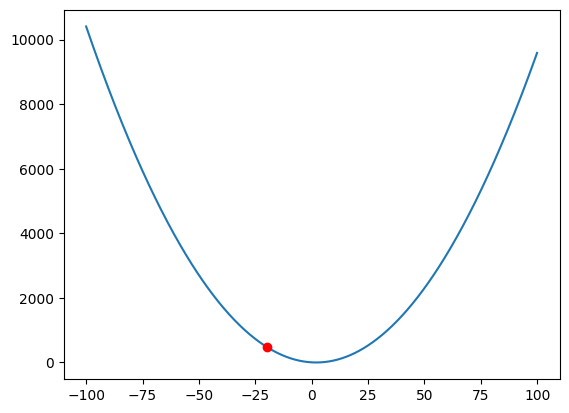

In [15]:
plt.plot(np.arange(-100,100,0.1),f(np.arange(-100,100,0.1)))
plt.plot(x,f(x), color='red', marker='o')   
plt.show()

#### Subida da colina global

Podemos modificar o algoritmo da subida da colina para procurar não apenas a primeira mas a melhor solução ajustada a partir de um solução referencia. Este conj. de soluções candidatas é chamada de vizinhança da solução de referencia e pode ser gerada de maneira deterministica ou estocatica. Apos gerado o conj. o algortiom seleciona a melhor solução candidata que possa ser a referencia.

```pseudo
_____________________________________
ALG   : Subida da colina global
INPUT : INITIAL S
OUTPUT: BEST S
_____________________________________
INICIO:
    ENQUANTO <condição> FAÇA:
        r <-<argumento>MAX{Q(R') : R'<- ajusta(S)}
        SE Q(R) > Q(S) ENTÃO:
            S <- R
        END
    END
    RETURN S
```

In [16]:
def ajutar(inicial):
    stocastic = np.random.normal(loc=inicial, scale=1, size=2)
    return stocastic[np.argmax(f(stocastic))]

def subidaColina(f, inicial, maxIter=100, memoria=False):
    print("solucao Inicial :", inicial, "f(inicial) : ", f(inicial))
    iter_ = 0
    pontos = [inicial]
    while iter_ != maxIter :
        
        R = ajutar(inicial)
        if np.isinf(f(R)): break

        if f(R) > f(inicial):    
            inicial = R
            if memoria: pontos.append(inicial)
        iter_ += 1

    return inicial, np.array(pontos)

In [17]:
f = lambda x:  -1 * (x **2 + 4 + np.cos(x**3))
x,p  = subidaColina(f, 10, 100, memoria=True)
x

solucao Inicial : 10 f(inicial) :  -104.5623790762907


np.float64(0.017812784603571025)

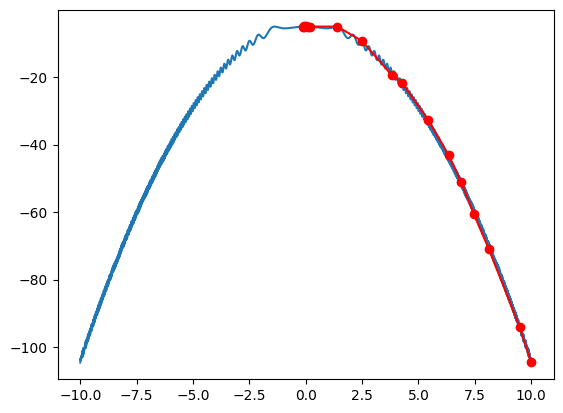

In [18]:
pi = np.arange(-10,10,0.01)
plt.plot(pi,f(pi))
plt.plot(p,f(p), color='red', marker='o')   
plt.show()


#### Caminhada aleatória
Outra modificação possivel da subida da colina é a tomar de referencia não apenas com melhor solução encontrada mas ultima solução encontrada. Nesse caso estamos fazendo para solução possivelmente piores, mas que contribuem  para desangua no processo. Como importante conseguencia este agoritmo não para em otimos locais é a nossa primeira metaheuristica de otimização global.

```pseudo
______________________________________
ALG   : Caminhada aleatória
INPUT : INITIAL S 
OUTPUT: BEST S
______________________________________
INICIO:
    R <- S
    ENQUANTO <condição> FAÇA:
        R <- ajusta(S)
        SE Q(R) > Q(S) ENTÃO:
            S <- R
        END
    END
    RETURN S
```

In [19]:
def ajutarA(inicial):
    stocastic = np.random.normal(loc=inicial, scale=1, size=2)
    return np.random.choice(stocastic, 1)[0]

def caminhadaAleatoria(f, inicial, maxIter=100, memoria=False):
    print("solucao Inicial :", inicial, "f(inicial) : ", f(inicial))
    iter_ = 0
    pontos = [inicial]
    while iter_ != maxIter :
        
        R = ajutarA(inicial)
        if np.isinf(f(R)): break

        if f(R) > f(inicial):    
            inicial = R
            if memoria: pontos.append(inicial)
        iter_ += 1

    return inicial, np.array(pontos)

In [20]:
f = lambda x:  -1 * (x **2 + 4 + np.cos(x**3))
x,p  = caminhadaAleatoria(f, 10, 100, memoria=True)
x

solucao Inicial : 10 f(inicial) :  -104.5623790762907


np.float64(0.04453614992171348)

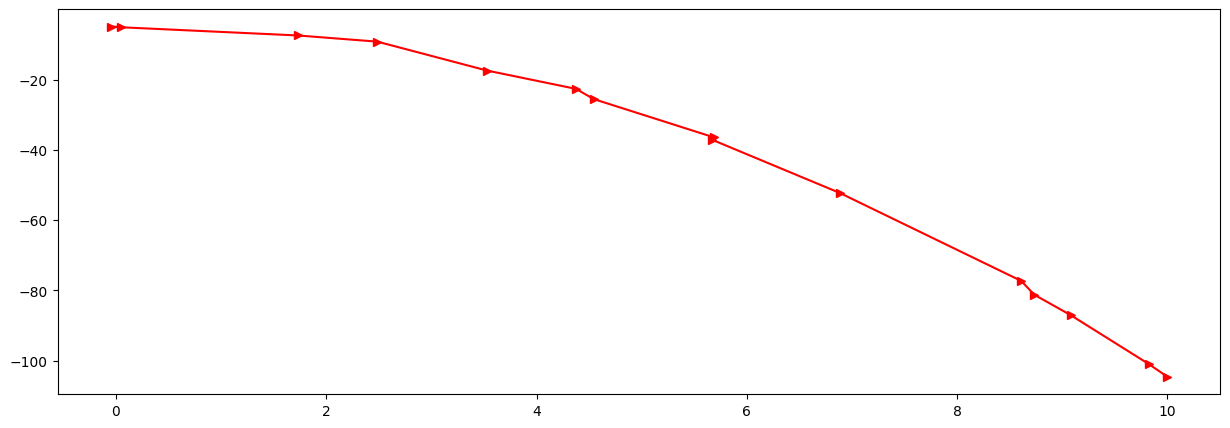

In [21]:
plt.figure(figsize=(15,5))
plt.plot(p,f(p), color='red', marker='>')   
plt.show()

#### Subida da colina com reinicio aleatorio
Vamos combiniar a subida da colina com o reinicio aleatorio no qual realizamos uma subida na colina e depois de um tempo retornamos para outra solução inicial.


```pseudo
_______________________________________________
ALG   : Subida da colina com reinicio aleatorio
INPUT : INITIAL S 
OUTPUT: BEST S
_______________________________________________
INICIO:
    SOLUCAO_INICIAL <- S
    B <- S
    ENQUANTO <condição 1> FAÇA:
        ENQUANTO <condição 2> FAÇA:
            R <- Ajustar(S)
            SE Q(R) > Q(S) ENTÃO:
                S <- R
            END
        END
        SE Q(S) > Q(B) ENTÃO:
            B <- S
        END
        S <- SOLUCAO_INICIAL
    END
    RETURN B
```

In [22]:
def ajustarCR(solucao):
    stocastic = np.random.normal(loc=solucao, scale=0.5, size=2)
    return stocastic[np.argmax(f(stocastic))]


def subidaColinaReinicio(f, inicio, maxIter=100, memoria=False):
    pontos = []
    iter_ = 0
    B = solucao_inicial = inicio
    count_  = 0
    countB_ = 0

    while iter_ != maxIter:
        iterRandom_, iterW = int(random.randint(10, maxIter//3)), 0

        while iterW != iterRandom_:
            R = ajustarCR(inicio)

            if np.isinf(f(R)): break
            
            if f(R) > f(inicio):            
                inicio = R
                count_ += 1
            iterW += 1
            
        if f(inicio) > f(B):
            B = inicio
            countB_ += 1
            if memoria: pontos.append(B)
        
        inicio = solucao_inicial
        iter_ += 1
    print(f"""
          RESULTADOS
Solucao inicial......: {solucao_inicial}  
    > f(inicial).: {f(inicio)}

Melhor solução.......: {B}              
    > f(B).......: {f(B)}
B foi modificado.....: {countB_}
R foi modificado.....: {count_}
""")
    return B, np.array(pontos)

In [23]:
f = lambda x:  -1 * x **2 + 4 + np.cos(x**3)
x, p  = subidaColinaReinicio(f, -100, 1000, memoria=True)


          RESULTADOS
Solucao inicial......: -100  
    > f(inicial).: -9995.063247872467

Melhor solução.......: -4.989155411663272e-05              
    > f(B).......: 4.999999997510833
B foi modificado.....: 5
R foi modificado.....: 123841



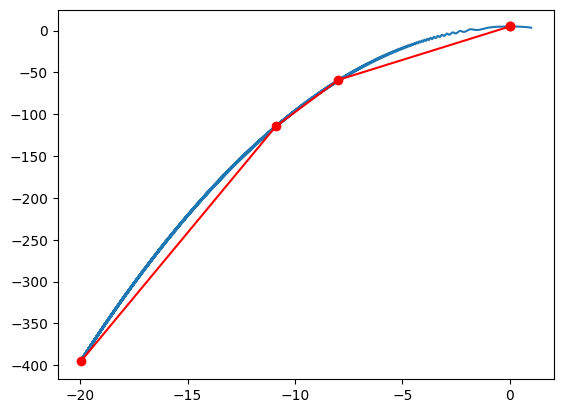

In [24]:
pi = np.arange(-20,1,0.0001)
plt.plot(pi,f(pi))
plt.plot(p,f(p), color='red', marker='o')

&nbsp;

### Operador ajustar
Vamos que entre as caracteristicas exigidas para a aplicação das metaheuristicas está a capacidade de transformar uma solução em outra solução através da operação que chamamos ajustar.
Não existe a priori uma definição unica para essa operação ele costuma ser dependente da estrutura de representações das soluções.
Há, contudo, uma nação de que a modificação promovida é pequena e de natureza estocatica. Dessa forma a partida de uma solução S, e conj. de ajustes possíveis define uma vizinhança de S, ou seja todos as soluções alcançaveis a partir de S atraves de uma operação de Ajuste. Timpicamente este é um conj. pequeno se comparado ao conj. de todas as possíveis soluções do ploblema, o que torna o processo de otimização possivel.

Exemplo de AJUSTE
1. Representar atraves de um vetor
    * [ | | | x | | | | |] sortear uma posição e modificar o valor
    * [ | | x | | | | | | |] sortear uma posição e incrementar/decrementar o valor

2. Representação através de um permutação
    * Sortear duar posições e troca-las de um lugar
    * Sortear uma posição e trocar dois valores adjacentes


In [25]:
random.choices([1 , 2 , 3 , 4])

[4]

In [26]:
import random

def ajustar_valor(lista):
    # Sortear uma posição aleatória
    posicao = random.randint(0, len(lista) - 1)
    
    # Incrementar ou decrementar o valor na posição sorteada
    lista[posicao] += random.choice([-1, 1])
    
    return lista

# Exemplo de uso
lista = [1, 2, 3, 4, 5]
nova_lista = ajustar_valor(lista)
print(nova_lista)

[2, 2, 3, 4, 5]


&nbsp;

### Recozimento Simulado

Em metaheurísticas, **recozimento simulado** refere-se a um algoritmo inspirado no processo de recozimento térmico, utilizado para resolver problemas combinatórios ou otimização global. Ele é amplamente utilizado em diversas aplicações, como:

### Definição:
O **recozimento simulado** é uma metaheurística que busca minimizar uma função objetiva por meio da exploração de vizinhanças em estados possíveis, ao longo de várias iterações, similar ao processo de resfriamento controlado em materiais metálicos.

### Funcionamento Geral:
1. **Inicialização**: Inicia-se com uma solução inicial aleatória.
2. **Avaliação**: A solução atual é avaliada com base em uma função objetivo.
3. **Movimento**: Em cada iteração, uma nova solução vizinha é gerada.
4. **Aceitação**: A nova solução é aceita com base em critérios probabilísticos que consideram a diferença na função objetivo entre a solução anterior e a nova. A aceitação é mais provável quando a diferença é pequena, mas também pode ocorrer com diferenças maiores, dependendo da temperatura simulada.
5. **Resfriamento**: A temperatura simulada diminui gradualmente ao longo das iterações, o que reduz a possibilidade de aceitar mudanças drásticas na solução.

### Propósito do Recozimento Simulado em Metaheurísticas:
- Explorar o espaço de solução globalmente enquanto permite explorar soluções locais.
- Evitar a convergência rápida para soluções subótimas.
- Melhorar a eficiência da busca por soluções ótimas em problemas complexos de otimização.

### Aplicações:
- **Otimização de roteamento** (VRP - Vehicle Routing Problem).
- **Ajuste de parâmetros** em modelos de machine learning.
- **Design de circuitos** e outros problemas combinatórios.

O recozimento simulado é uma ferramenta poderosa para lidar com problemas onde há um grande número de combinações possíveis e soluções locais muitas vezes podem ser subótimas.

```pseudo
_____________________________
ALG   : RECOZIMENTO SIMULADO
INPUT : INITIAL S
OUTPUT: BEST B 
_____________________________
INICIO:
    B <- S
    T <- temperatura inicial
    ENQUANTO <CONDICAO> E T > 0 FAÇA:
        R <- Ajustar(S)
        P <- ALEATORIO(0,1)

        SE Q(S) > Q(R) OU P < exp({Q(R) -Q(S)}/ {t})
            S <- R
        END
        SE Q(S) > Q(B) ENTÃO:
            B <- S
        END
        DECREMENTA T
    END
    RETURN B     
```

> O recozimento simulado apresenta a seguinte proposta:   
> Inicialmente vamos começar com alta prob. de aceitar a solução piores como referencia e essa prob. vai decrescendo lentamente ao longo das iterações ate que o algoritmo chega a um comportamento de subida da colina. De fato a  parte de um parametro de temperatura T, e prob. de aceitar a solução R no lugar de S é:

In [27]:
import random
import math

def ajustarRS(s):
    return s + random.uniform(-1, 1)

# Recozimento Simulado
def recozimento_simulado(f, inicio, temperatura, resfriamento, maxIter):
    # Inicializar solução inicial aleatória
    B = inicio
    valor_atual = f(inicio)
    iter_ = 0
    while iter_ != maxIter and temperatura > 0:
        # Gerar solução vizinha
        R = ajustarRS(inicio) 
        
        P = random.uniform(0, 1)
        # Aceitação da solução
        if f(inicio) > f(R) or P < np.exp((f(R) - f(inicio)) / temperatura):
            inicio  = R
        if f(inicio) > f(B):
            B = inicio
        
        # Resfriamento
        temperatura -= resfriamento

    return B, valor_atual

In [28]:
inicio = random.uniform(-10, 10)  # Solução inicial aleatória
temperatura = 1000                # Temperatura inicial
resfriamento = 0.095              # Taxa de resfriamento
it_max = 1000                     # Número máximo de iterações

# Função objetivo: maximizar x^2 - 10 * cos(2 * π * x)
f = lambda x: -1*(x**2 - 10 * math.cos(2 * x))

melhor_solucao, melhor_valor = recozimento_simulado(f,inicio, temperatura, resfriamento, 1000)
print(f'Solução ótima.: x = {melhor_solucao}\n valor ótimo..: {melhor_valor}')


Solução ótima.: x = 0.0004252308244678815
 valor ótimo..: -53.495494569895016


In [29]:
p = np.arange(-10, 10, 0.1)
resultados = np.vectorize(f)(p)

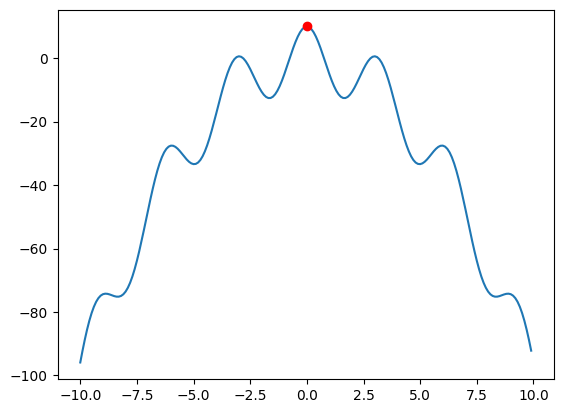

In [30]:
plt.plot(p, resultados)
plt.plot(melhor_solucao, f(melhor_solucao), color='red', marker='o')

In [31]:
melhor_solucao, f(melhor_solucao)

(0.0004252308244678815, 9.99999620275388)

### Busca Tabu
A busca tabu é um método que define uma lista de soluções proibidas para evitar a repetição e garantir a exploração de novas regioes do espaço de soluções. De fato, funciona como uma subida da colina de maxima inclinação mas cada vez que uma nova solução é atingida a anterior é adicionada na list de soluções tabu, para que as quais não é possivel retornar.


> Esta lista é relativa - quando ela está cheia o elemento mais antigo é removido.

```pseudo
______________________________
ALG   : BUSCA TABU
INPUT : INITIAL S
OUTPUT: BEST B
______________________________
INICIO:
    B <- S
    T <- []
    ENQUANTO <condição> FAÇA:
        INCLUIR(T, S)
        S <- ARG MAX {Q(R): R pertence VIZINHANÇA(S)\T}

        SE Q(S) > Q(B) ENTÃO:
            B <- S
        END
    END
    RETURN B
END
```

In [32]:
def incluir(T, S, limit = 5):
    if len(T) != limit:
        T.append(S)
        return T
    del T[0]
    T.append(S)
    return T


def ajustaBT(f, s, T, size_=2):
    s_ =  np.around(np.random.uniform(-1, 1, size=size_), 4).tolist()

    s_ = np.array([ i for i in s_ if i not in T], dtype=np.float32)
    
    return s_[np.argmax(f(s_))]

def buscaTabu(f, S, limit=5, maxIter=100, memoria = False, tamConjunto=2):
    pontos_ = [S]   
    T = []
    B = S
    iter_ = 0
    while iter_ != maxIter:        
        # Incluir a solução na lista tabu
        T = incluir(T, S, limit)
        

        # Gerar solução vizinh
        S = ajustaBT(f, S, T,size_=tamConjunto)
        
        if f(S) > f(B):
            B = S
            print(S)
            if memoria: pontos_.append(B)
        iter_ += 1
    return B, np.array(pontos_)

In [33]:
f = lambda x: -1*(np.pi*x**2 -10 * np.sin(10 *  x*2))
x, p = buscaTabu(f, 5, 5, 10, memoria=True)
x

0.4506
-0.242


np.float32(-0.242)

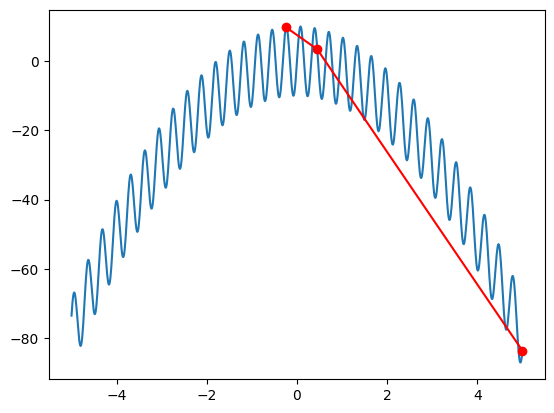

In [34]:
pi = np.arange(-5, 5,0.01)
fxs = np.vectorize(f)(pi)


plt.plot(pi, fxs)
plt.plot(p, np.vectorize(f)(p), color='red', marker='o')

### Busca tabu baseada em caracteristicas

Quando o conj. de soluções é muito grande a proibição de soluções individualmente é pouco eficaz, pois exige uma lista tabu muito grande para garantir uma diversificação satisfatória. O tamanho da lista pode ser um empecilho para eficiencia e calibragem do método. Neste sentido, uma alternativa é ter uma lista tabu com caracteristicas proibidas no qual ao inver de proibir soluções individualmente vamos proibir um caracteristicas que compõem essa solução.

```pseudo
_____________________________________________
ALG   : BUSCA TABU BASEDA EM CARACTERISTICAS
INPUT : INITIAL S
OUTPUT: BEST B
_____________________________________________
INICIO:
    B <- S
    T <- vazio
    ENQUANTO <condição> FAÇA:
        Z <- ARG MAX { Q(R) : R pertence VIZINHAÇA(S)}
        T <- T U CARACTERISTICAS(Z - S)
        SE Q(Z) > Q(B) ENTÃO:
            B <- Z
        END
    END
    RETURN B
```

&nbsp;

### Busca em Vizinhança variável

Ao elaborar uma metaheuristica, somos obrigados a conceber métodos de ajusta de uma solução, uma forma de sair de uma solução e chegar a outra. Porém, podemos utilizar não apensa um, mas varioas operadores de ajusta. Esta complexificação, que baseia o método da vizinhaça varíval, sendo apoiada em tre fatos:
1. Um otimos local com respeito a um operador pode nçao ser um otimo local para um operador diferente.
2. Um otimoo global é um otimo local para todos os possiveis ajustes.
3. Para muitos problemas um otimo local com repeito a um operador não fica logo de um otimo local com respeito a outros operadores.

Para explorar esses fatos vamos definir uma busca de maxima interacao que considera um conj. de vinhanças possiveis a partir de diferentes operadores. Cada vizinhança $N_e$ , e = $1,...,L$
fica a ordem de forma que, se primeira vizinhança não prever uma melhor solução então a segunda é pesquisida e assim por diante. Quanto nenhuma vizinhaça é capaz de dar uma melhor resposta o algoritmo chega ao limite das suas propriedas

```pseudo
____________________________________________
ALG   : SUBIDA EM UMA VIZINHANÇA VARIÁVEL
INPUT : INITIAL S
OUTPUT: BEST S
____________________________________________
INICIO:
    i <- 1
    ENQUANTO <CONDIÇÃO> E i>=L FAÇA:
        R <- ARG MAX{ Ne }
        SE Q(R) > Q(S) ENTÃO:
            S <- R
            i <- 0
        FIM
        i < i + 1
    END
    RETURN S
```

In [35]:
def geraVizinhos(s, n, intervalos):
    vizinhos = []
    for i in range(n):
        vizinhos.append(
            max( intervalos[0], min(intervalos[1], s + random.uniform(-1, 1)))   
        )

    return vizinhos

In [36]:
def vizinhaVariavel(f, S, Lmax=10, intervalo=[-10, 10], nVizinhos = 5, memoria=False):
    '''
    ### Parametros da função
    F        : Função objetivo
    S        : Solução inicial
    Lmax     : Número máximo de iterações sem melhora
    intervalo: Intervalo de busca
    nVizinhos: Número de vizinhos a serem gerados
    memoria  : Salvar as soluções
    '''
    pontos =[S]
    i = 0 

    # Inicializar solução inicial
    while i < Lmax:
        # Gerar solução vizinha
        R = max(
            geraVizinhos(S, nVizinhos, intervalo), key=f
        )

        # Aceitação da solução
        if f(R) > f(S):
            S = R
            i = 0
            if memoria: pontos.append(S)
        # Incrementar o contador
        else: 
            i += 1
    return S, pontos

In [37]:
# Função objetivo: maximiza 
f = lambda x: -1*(np.pi*x**2 -10 * np.sin(10 *  x*2))

In [38]:
x, p = vizinhaVariavel(
    f, 
    5, 
    10, 
    [-10, 10], 
    5, 
    memoria=True)

In [39]:
pi = np.arange(-5, 5,0.01)
fxs = np.vectorize(f)(pi)

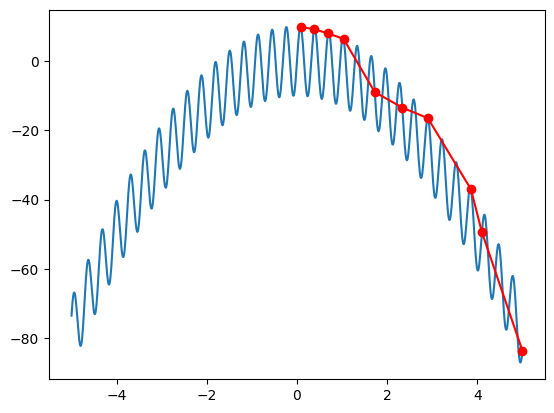

In [40]:
plt.plot(pi, fxs)
plt.plot(p, np.vectorize(f)(p), color='red', marker='o')

Completando o método, vamos utilizar a subida da vizinhança variável de um enquadramento de busca lcal iterada onde substuimos a subida da colina por uma subida um vizinhança variável.

```pseudo
_____________________________________
ALG    : BUSCA EM VIZINHANÇA VARIÁVEL
ENTRADA: SOLUÇÃO INCIAL S
SAÍDA  : MELHOR SOLUÇÃO B
_____________________________________
INICIO: 
    B <- S
    H <- H
    ENQUANTO <CONDIÇÃO> FAÇA:
        S <- SUBIDA_EM_VIZINHAÇA_VARIAVEL(S)
        SE Q(S) > Q(B) ENTÃO:
            B <- S
        FIM
        H <- NOVA_BASE(H, S)
        S <- PERTURBAR(H)
    RETURN B 
```

In [41]:
def perturbar(S):
    return round(S + np.random.uniform(-1, 1), 3)

def nova_base(f, H, S):
    if f(H) > f(S):
        return H 
    return S

In [42]:
def buscaVizinhançaVariavel(f, inicial, maxIter=100, memoria = False):
    S = inicial
    H = inicial
    B = copy.deepcopy(S)
    iter_ , pontos = 0, [S]

    while iter_ != maxIter:
        S, _ = vizinhaVariavel(f, S)

        if f(S) > f(B):
            B = S 
            
            if memoria: pontos.append(B)
        H = nova_base(f, H, S)
        S = perturbar(H)
        iter_ += 1
    return B, pontos

In [43]:
# Função objetivo: maximiza 
f = lambda x: -1*(np.pi*x**2 -10 * np.sin(10 *  x**3)) 

In [44]:
x, p = buscaVizinhançaVariavel(f, np.random.RandomState(20).randint(-1, 1), memoria=True)

In [45]:
x, p, np.vectorize(f)(p)

(0.5351457964769281,
 [0,
  0.5269917456589301,
  0.5357442808205397,
  0.5357052423973913,
  0.5352482912725591,
  0.5348433609774256,
  0.5351457964769281],
 array([-0.        ,  9.07007615,  9.09281886,  9.09283849,  9.09298494,
         9.09298688,  9.09299676]))

In [46]:
pi = np.arange(-1, 1,0.001)
fxs = np.vectorize(f)(pi)

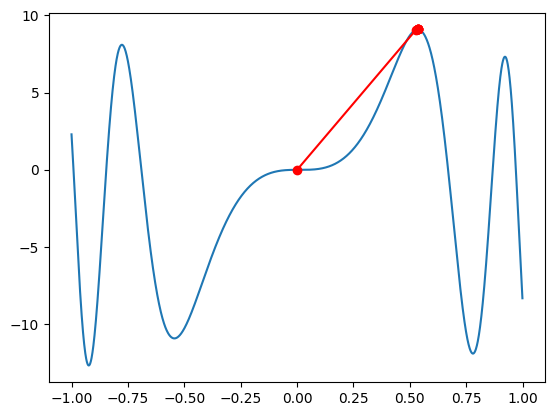

In [47]:
plt.plot(pi, fxs)
plt.plot(p, np.vectorize(f)(p), 
         color='red', marker='o')

&nbsp;

### GRASP

A meta-heuristica grasp remete aos procedimentos construtivs que vemos no inicio d curso, cada iteração uma escolha é realizada até a formação de uma solução completa. Contudo a forma como esta escolha é realizada n GRASP É inovadra e, de certa, forma mais exigente que as metaheuristicas que vimos até o momento.
No GRASP supomos que um solução poder ser decomposta em C1, C2, C3, ... Cn, de forma que é possivel contruir uma solução fazendo escolhas sucessivas de sua compenentes.
Mais que isso, é preciso que tenhamos um criterio de qualidadde dos componentes, ou seja, uma estimação de quanto a componenet pode construir para a eventual solução a ser formada.

In [48]:
from scipy.spatial.distance import euclidean

def dist(a, b):
    return euclidean(a, b)

def calculaDistancias(cidades):
    distancias = []
    tamanho    = np.size(cidades, 0)
    for i in range(tamanho):
        L = []
        for j in range(tamanho):
            L.append(
                dist(cidades[i], cidades[j])
            )
        distancias.append(L)
    return np.array(distancias)

In [49]:
n_cidades = 10
cidades_  = np.random.RandomState(1).rand(n_cidades, 2) * 100

In [50]:
dist_ = calculaDistancias(cidades_)

In [51]:
def GRASPSolucaoIncial(distancia, n):
    visitados = [0]

    while ( len(visitados) < n ):
        proximos = []
        
        for i in range(n):
            ultimoVisitado = visitados[-1]
            if i not in visitados:
                proximos.append((i, distancia[ultimoVisitado][i]))
                
        visitado = min(proximos, key=lambda x:x[1])[0]
        visitados.append(visitado)

    return visitados

In [52]:
def distanciaTotal(S, distancias):
    distTotal = []
    n = len(S)
    for i in range(n):
        distTotal.append(
            distancias[S[i]][(i + 1)%n]
            )
    return np.sum(distTotal)

In [53]:
def GRASPBuscaLocal(S, distancias):
    B = S
    n = len(S)
    for i in range(n - 1):
        for j in range( i + 1, n):
            S[i], S[j] = S[j], S[i]
            if distanciaTotal(S, distancias) < distanciaTotal(B, distancias):
                B = S
            S[i], S[j] = S[j], S[i]
    return B

In [54]:

def GRASP(n_cidades, distancias, iteracao):
    B = None
    menorDist = float("inf")
    print("solucao inicial :" , B)
    count = 0 
    for _ in range(iteracao):
        S = GRASPSolucaoIncial(distancias, n_cidades)
        S = GRASPBuscaLocal(S, distancias)

        distanciasAtual = distanciaTotal(S, distancias)

        if distanciasAtual < menorDist:
            B = S
            menorDist = distanciasAtual
            count += 1
    
    print(f"""
Solucao   = {B},
Distancia = {menorDist}
B foi modificado {count}
""")


In [55]:
GRASP(n_cidades, dist_, 100)

solucao inicial : None

Solucao   = [0, 5, 8, 4, 3, 9, 2, 1, 7, 6],
Distancia = 448.247415153896
B foi modificado 1



&nbsp;

## Problema do Caixeiro Viajante (TSP - Travelling Salesman Problem) 

Definição:
Um caixeiro viajante precisa visitar várias cidades exatamente uma vez cada e retornar à cidade de origem. O objetivo é encontrar a rota mais curta possível que conecte todas as cidades.

In [56]:
def gerarRotas(numeroCidades=10, seed=10, m = 100):
    return np.around(
        a = np.random.RandomState(seed=seed).rand(numeroCidades, 2) * m,
        decimals = 2
        )

In [163]:
from scipy.spatial.distance import minkowski, euclidean
def distanciaTotal(rotas, type_ = "euclidian"):
    dist_ = []
    for enum, i in enumerate(rotas, start=0):
        for j in rotas[enum:]:
            dist_.append(
                euclidean(i, j) if type_ == 'euclidean' else minkowski(i, j)
            )
    return np.sum(dist_)

In [164]:
rotas = gerarRotas()

In [165]:
rotas

array([[77.13,  2.08],
       [63.36, 74.88],
       [49.85, 22.48],
       [19.81, 76.05],
       [16.91,  8.83],
       [68.54, 95.34],
       [ 0.39, 51.22],
       [81.26, 61.25],
       [72.18, 29.19],
       [91.78, 71.46]])

### Força bruta para achar a melhor rota

In [166]:
from itertools import permutations
def permutacao(cidades=10):
    return permutations([i for i in range(cidades)])

Testa todas as opções para encontrar o ótimo

In [167]:
def forcaoBruta(rotas, cidades, calDistancia ='euclidean'):
    S = float('inf') 
    B = None

    # Verificas todas as possibilidades para achar o otimo
    for P in permutacao(cidades):
        R = distanciaTotal(rotas[P, :], type_='euclidean')    
        if R < S:
            S = R
            B = P
        
    return rotas[B, :], S , B

In [168]:
bestRotas, S, B = forcaoBruta(gerarRotas(8, m=10), 8, 'euclidean')

In [170]:
bestRotas, S, B

(array([[7.71, 0.21],
        [6.34, 7.49],
        [4.99, 2.25],
        [1.98, 7.61],
        [1.69, 0.88],
        [6.85, 9.53],
        [0.04, 5.12],
        [8.13, 6.13]]),
 np.float64(171.7922015720486),
 (0, 1, 2, 3, 4, 5, 6, 7))

### Vizinho mais proximo

In [305]:
def distanciasVMP(rotas, cidade):
    index = np.argmin([ euclidean(i, cidade) for i in rotas])
    print([ euclidean(i, cidade) for i in rotas], index, rotas[index, :])

    return rotas[index, :], index

In [306]:
def vizinhoMaisProximo(rotas, inicio):
    vizitados = [inicio]
    rotas_    = [rotas[inicio, :]]
    rotas     = np.delete(rotas, inicio, 0)
    

    while not(len(rotas) == 0):
        R, idx = distanciasVMP(rotas, rotas_[-1])
        rotas_.append(R)

        rotas = np.delete(rotas, idx, 0)
        
    return rotas_, np.array(vizitados)

In [307]:
rotas = gerarRotas(8, m=10)

In [308]:
for vmp in range(8):
    s = vizinhoMaisProximo(rotas, vmp)[0]
    print('inicio em ', vmp, 'S = ', distanciaTotal(rotas))

[7.407786444006064, 3.4, 9.359107863466475, 6.057169305872174, 9.359594008289033, 9.106975348599555, 5.934879948238212] 1 [4.99 2.25]
[5.411108943645471, 6.1473327549434, 3.5730799039484133, 7.513853871349907, 5.721835369879145, 4.991392591251464] 2 [1.69 0.88]
[8.081744861105182, 6.736245244941725, 10.072144756704006, 4.549736256092214, 8.308796543423123] 3 [0.04 5.12]
[6.731040038508165, 3.1565329081129505, 8.113211448002572, 8.152803198900365] 1 [1.98 7.61]
[4.361651063530873, 5.234816138127488, 6.32557507267126] 0 [6.34 7.49]
[2.102783869065006, 2.248043593883358] 0 [6.85 9.53]
[3.6329602254910527] 0 [8.13 6.13]
inicio em  0 S =  171.7922015720486
[7.407786444006064, 5.411108943645471, 4.361651063530873, 8.081744861105182, 2.102783869065006, 6.731040038508165, 2.248043593883358] 4 [6.85 9.53]
[9.359594008289033, 7.513853871349907, 5.234816138127488, 10.072144756704006, 8.113211448002572, 3.6329602254910527] 5 [8.13 6.13]
[5.934879948238212, 4.991392591251464, 6.32557507267126, 8.30

In [280]:
distanciaTotal(vmp[0])

np.float64(2471935.7956682458)

In [269]:
x, y= np.array(vmp[0])[:,0], np.array(vmp[0])[:, 1]

np.float64(247190.42756026483)

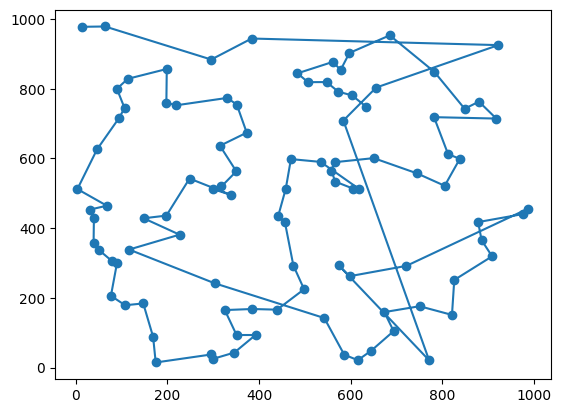

In [270]:
plt.plot(x, y, '-o')
plt.show()

### Vizinho mais proximo verificando todas as cidades no inicio

In [207]:
def vmpCompleta(rotas, cidades):
    S_ = [vizinhoMaisProximo(rotas, inicio) for inicio in range(cidades)]
    return ([[distanciaTotal(rotas), caminho] for rotas, caminho in S_]), S_

In [208]:
A = vmpCompleta(rotas, 10)
A[0]

[[np.float64(247190.42756026483),
  array([ 0, 73, 55, 85, 25, 27, 15, 54, 35, 43, 25, 14, 71,  6, 71, 43, 76,
         31,  7, 68, 78, 68, 56, 15, 59, 67, 55, 38, 21,  4,  0, 51, 54, 30,
         48, 26,  8,  8, 17, 38, 52,  7, 52, 25,  0, 42, 46, 12, 51, 12, 18,
         19, 40, 42,  1, 30, 27, 41,  5, 12, 24, 11, 12, 32, 18,  1,  5, 31,
         20, 26,  4,  4,  0, 16,  6,  3,  2,  4, 10,  8,  9,  7,  9, 13, 12,
          9, 12,  5,  1,  5,  8,  5,  3,  6,  0,  3,  1,  0,  0,  0])],
 [np.float64(247190.42756026483),
  array([ 1, 85, 69, 19, 73, 85, 68, 48, 28,  4, 77, 81, 34,  7, 45,  5, 72,
         11, 69, 10, 64, 35, 56, 31,  9, 22, 47, 64,  8, 64, 31,  1, 53, 57,
         14, 64, 14, 23, 25, 51, 54,  2, 39, 35, 53,  7, 17, 32, 16, 17, 43,
         25,  2,  7, 43, 29, 37,  6,  6,  1, 25, 11,  5,  3,  9, 17, 15, 16,
         13, 18, 24, 22, 18, 24, 11,  2, 12, 19, 14, 17, 12, 16,  4,  6,  2,
          9,  5,  7,  4,  1,  3,  7,  0,  5,  5,  3,  1,  0,  0,  0])],
 [np.float64(24719

In [155]:
distanciaTotal(A[1][0][0]),distanciaTotal(A[1][1][0])

(np.float64(5282.012336092314), np.float64(5282.012336092314))